<a href="https://colab.research.google.com/github/rodrigomluz/codekdata/blob/main/WebScraping_Bitcoin_from_Yahoo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##WebScraping BTC-USD price from Yahoo-finance.

In [5]:
#importando as bibliotecas
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests


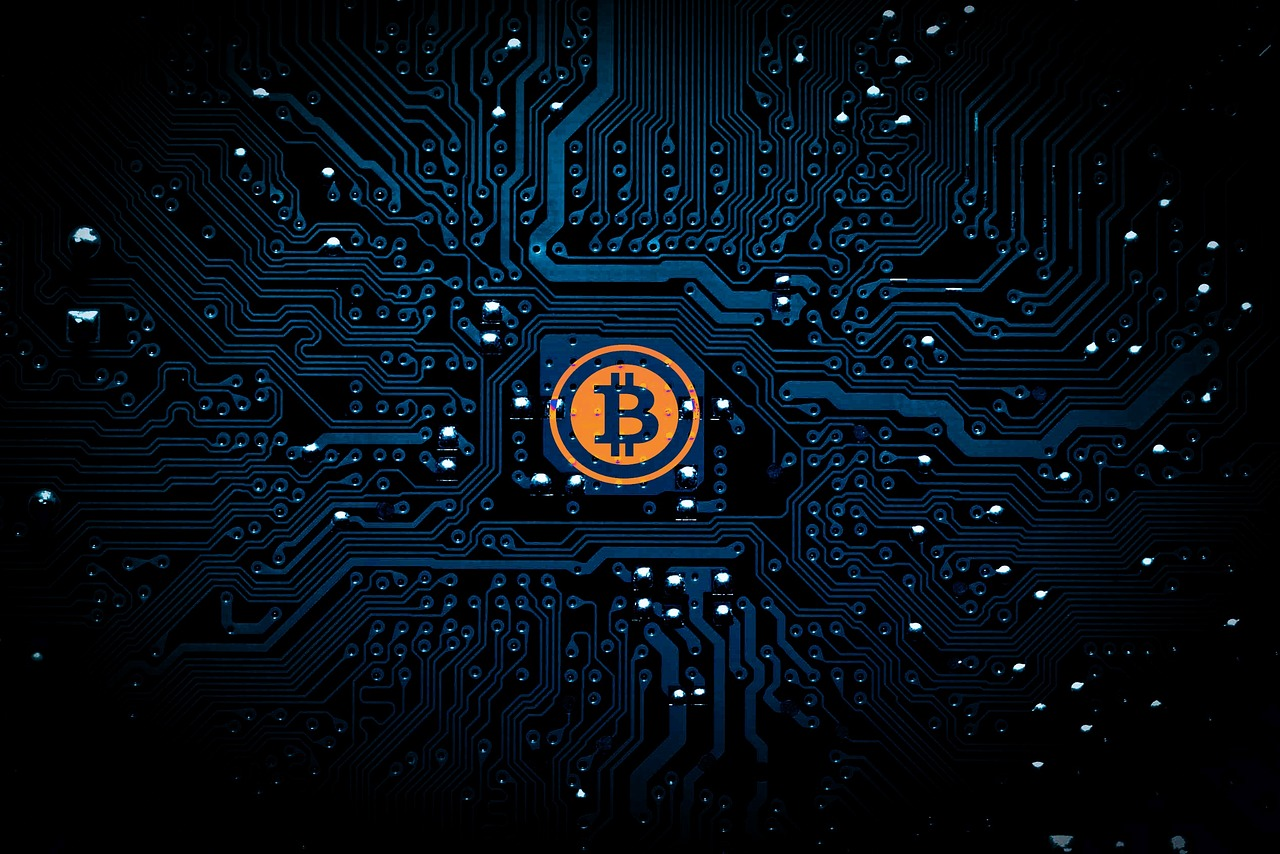


Para uma melhor compreensão do que foi feito sugiro que seja executado cada linha separadamente fora da função. 

In [129]:
def parsePrice():
  # fazendo a request do site.
  r = requests.get('https://br.financas.yahoo.com/quote/BTC-USD?p=BTC-USD')

  soup = bs(r.content, 'html.parser')

  #print(soup.prettify())


  btc = soup.find('div', attrs={'class':'D(ib) Mend(20px)'})

  #print(btc)

  #localizando preço do bitcoin
  price = [btc.find('span', attrs={'class':"Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)"}).get_text()]

  #print(price)

  #localizando a valorização
  valorizacao = [btc.find('span', attrs={'class':"Trsdu(0.3s) Fw(500) Pstart(10px) Fz(24px) C($positiveColor)"}).get_text()]
  #print(valorizacao)

  #criando um dicionáio
  btc_usd = {'Nome':'BTC-USD','Price':price, 'Valorização':valorizacao}
  
  #criando um data frame a parir do dicionário
  df = pd.DataFrame(btc_usd)

  return df

print(parsePrice())



      Nome      Price       Valorização
0  BTC-USD  16.263,49  +161,15 (+1,00%)
